### Project 2 NumDiff TMA4212
Group members: Heidi Bjørnerud Vatnøy, Elias Rekkedal, Max Pfisterer

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

Set ut the subdivision ('triangulation') of space: Choose nodes $x_i$ and elements $K_k=(x_{k-1},x_{k})$. 

In [3]:
Xk = np.array([0, 0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
Mi = len(Xk)                     # Number of nodes
T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
H = Xk[1:]-Xk[:-1]               # Element sizes
Mk = Mi-1                        # Number of elements

In [4]:
print("\nNodes: ",Xk,"\n\nNumber of nodes: Mi = ", Mi)
print("\nCollection of elements ('triangulation'):\n\n T = \n\n",T,"\n\nNumber of elements: Mk = ", Mk,"\n\nElement sizes: H = ",H)


Nodes:  [0.   0.1  0.3  0.6  0.8  0.9  0.95 0.97 1.  ] 

Number of nodes: Mi =  9

Collection of elements ('triangulation'):

 T = 

 [[0.   0.1 ]
 [0.1  0.3 ]
 [0.3  0.6 ]
 [0.6  0.8 ]
 [0.8  0.9 ]
 [0.9  0.95]
 [0.95 0.97]
 [0.97 1.  ]] 

Number of elements: Mk =  8 

Element sizes: H =  [0.1  0.2  0.3  0.2  0.1  0.05 0.02 0.03]


## Problem 2
### a)
The finite elements method, setting up a stiffness matrix and integrating $f$ by the (second order) trapezoidal quadrature.

In [5]:
def FEM(nodes, alpha, b, c, f):
    """
    Fem method for our problem with dirichlet boundary conditions
    """
    Mi = len(nodes)                     # Number of nodes
    T = np.ndarray.transpose(np.array([nodes[:-1],nodes[1:]])) # Set of elements/triangulation
    H = nodes[1:]-nodes[:-1]               # Element sizes
    Mk = Mi-1                        # Number of elements
    
    # first creating the inner matrix
    e = np.ones(Mi)        # array [1,1,...,1] of length N
    A = (np.diag(-alpha/H+c*H/6-b/2*e[1:],-1)
         +np.diag(-alpha/H+c*H/6+b/2*e[1:],1))
    A[1:-1,1:-1] += np.diag(alpha*(1/H[:-1]+1/H[1:])+c*(H[:-1]+H[1:])/3)
    A[0,0] = alpha/H[0]+b/2+c*H[0]/3
    A[-1,-1] = alpha/H[-1]-b/2+c*H[-1]/3
    
    # Using trapezoidal quadrature
    F = np.zeros_like(nodes)
    F[1:-1] = f(nodes[1:-1],alpha,b,c)*(H[:-1]+H[1:])/2
    F[0] = f(nodes[0],alpha,b,c)*H[0]/2
    F[-1] = f(nodes[-1],alpha,b,c)*H[-1]/2
    return A, F

In [6]:
def u1(x):
    return x*(1-x)

def u2(x):
    return np.sin(3*np.pi*x)

def fex1(x,alpha,b,c):
    # u = x(1-x)
    return 2*alpha+b*(1-2*x)+c*x*(1-x)

def fex2(x,alpha,b,c):
    # u=sin(3 pi x)
    return np.sin(3*np.pi*x)*(alpha*(3*np.pi)**2+c) + b*3*np.pi*np.cos(3*np.pi*x)

Printing the resulting matrix $A$ and vector $F$ for $u1(x)$, before and after adding boundary conditions. Solve the problem for $U$.

In [7]:
alpha,b,c = 1,2,3
A,F = FEM(Xk, alpha, b, c, fex1)
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","F=", np.around(F,decimals=3, out=None))
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","F=", np.around(F,decimals=3, out=None))
U = np.linalg.solve(A,F)

A=
 [[ 11.1  -9.    0.    0.    0.    0.    0.    0.    0. ]
 [-11.   15.3  -3.9   0.    0.    0.    0.    0.    0. ]
 [  0.   -5.9   8.8  -2.2   0.    0.    0.    0.    0. ]
 [  0.    0.   -4.2   8.8  -3.9   0.    0.    0.    0. ]
 [  0.    0.    0.   -5.9  15.3  -9.    0.    0.    0. ]
 [  0.    0.    0.    0.  -11.   30.2 -19.    0.    0. ]
 [  0.    0.    0.    0.    0.  -21.   70.1 -49.    0. ]
 [  0.    0.    0.    0.    0.    0.  -51.   83.4 -32.3]
 [  0.    0.    0.    0.    0.    0.    0.  -34.3  32.4]] 

 F= [0.2   0.58  0.857 0.58  0.192 0.05  0.012 0.005 0.   ]
A=
 [[  1.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [-11.   15.3  -3.9   0.    0.    0.    0.    0.    0. ]
 [  0.   -5.9   8.8  -2.2   0.    0.    0.    0.    0. ]
 [  0.    0.   -4.2   8.8  -3.9   0.    0.    0.    0. ]
 [  0.    0.    0.   -5.9  15.3  -9.    0.    0.    0. ]
 [  0.    0.    0.    0.  -11.   30.2 -19.    0.    0. ]
 [  0.    0.    0.    0.    0.  -21.   70.1 -49.    0. ]
 [  0.    0.    0

Plot the solution. 

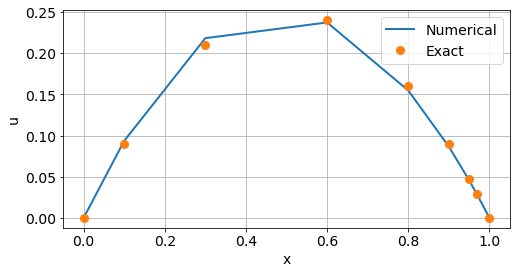

In [8]:
plt.plot(Xk,U,Xk,Xk*(1-Xk),'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');
plt.ylabel('u');

Doing the same for $u2(x)$.

In [9]:
alpha,b,c = 1,2,3
Xk2 = np.linspace(0,1,15)
A,F = FEM(Xk2, alpha, b, c, fex2)
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
U = np.linalg.solve(A,F)

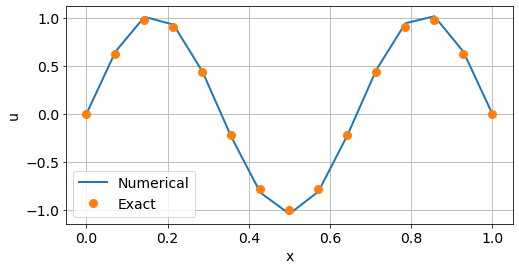

In [10]:
plt.plot(Xk2,U,Xk2,np.sin(3*np.pi*Xk2),'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');
plt.ylabel('u');

### b)

In [11]:
def convergence(u_exact, alpha, b, c, f, M): 
    P = 5
    stepconv = np.zeros(P)
    L2conv = np.zeros(P)
    H1conv = np.zeros(P)
    M = M

    xx = np.linspace(0,1,int(2**(P+2)*M))
    
    for p in range(P):
        x = np.linspace(0,1,M)
        A,F = FEM(x, alpha, b, c, f)
        # Boundary conditions
        A[0,:] = 0;
        A[0,0] = 1
        A[-1,:] = 0
        A[-1,-1] = 1

        F[0] = 0
        F[-1] = 0
        U = np.linalg.solve(A,F)
        U = np.interp(xx,x,U)
        
        EL2 = np.trapz((U-u_exact(xx))**2,xx)
        EH1 = np.sqrt(EL2 + np.trapz(np.gradient(U-u_exact(xx),xx)**2,xx))
        EL2 = np.sqrt(EL2)
        
        stepconv[p] = (x[1]-x[0])
        L2conv[p] = np.abs(EL2)
        H1conv[p] = np.abs(EH1)
        M = 2*M
        
    L2order = np.polyfit(np.log(stepconv),np.log(L2conv),1)[0]
    H1order = np.polyfit(np.log(stepconv),np.log(H1conv),1)[0]
    return stepconv, L2conv, L2order, H1conv, H1order 

In [12]:
def error_bound(h,alpha,b,c, u,f): 
    C = min(alpha/2, c-b**2/(2*alpha))
    x = np.linspace(0,1,10000)
    u_2deriv =np.gradient(np.gradient(u(x),x),x)
    EL2_u_2deriv = np.sqrt(np.trapz(u_2deriv**2,x))
    EL2_f = np.sqrt(np.trapz(f(x,alpha,b,c)**2,x))
    K=alpha+abs(b)+c+EL2_f
    return np.sqrt(2)*h*EL2_u_2deriv*K/C

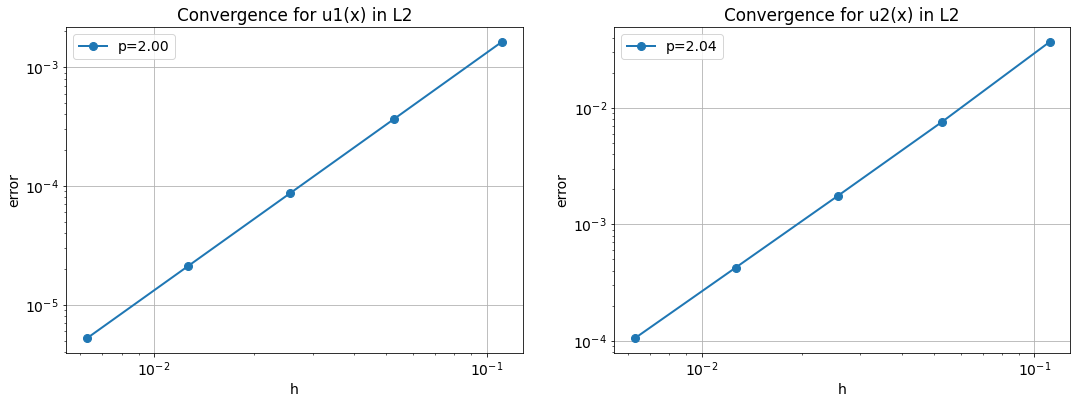

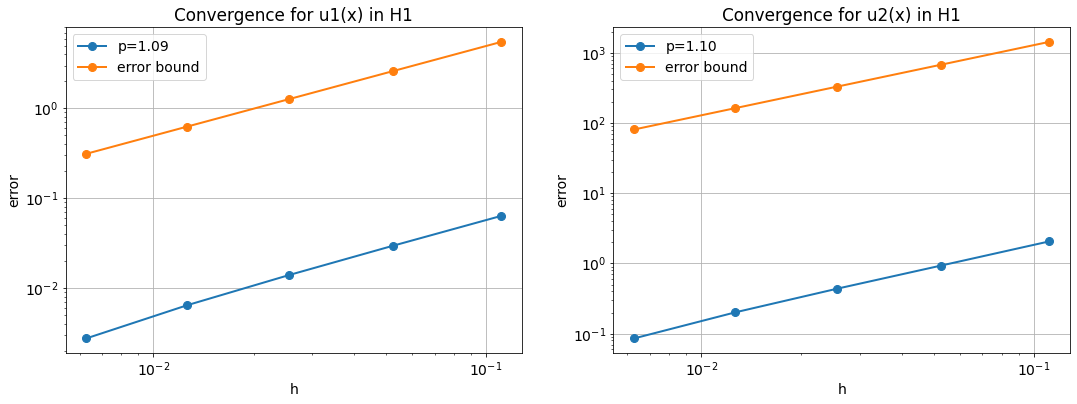

In [13]:
alpha,b,c = 1,2,3
step1, L21, pL21, H11, pH11 = convergence(u1, alpha,b,c, fex1, 10)
step2, L22, pL22, H12, pH12 = convergence(u2, alpha,b,c, fex2, 10)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.loglog(step1,L21,'o-', label='p={:.2f}'.format(pL21))
ax1.grid('on')
ax1.set_xlabel('h')
ax1.set_ylabel('error')
ax1.set_title('Convergence for u1(x) in L2')
ax1.legend();

ax2.loglog(step2,L22,'o-', label='p={:.2f}'.format(pL22))
ax2.grid('on')
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title('Convergence for u2(x) in L2')
ax2.legend();
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.loglog(step1,H11,'o-', label='p={:.2f}'.format(pH11))
ax1.loglog(step1,error_bound(step1,alpha,b,c,u1,fex1),'o-',label='error bound')
ax1.grid('on')
ax1.set_xlabel('h')
ax1.set_ylabel('error')
ax1.set_title('Convergence for u1(x) in H1')
ax1.legend();

ax2.loglog(step2,H12,'o-', label='p={:.2f}'.format(pH12))
ax2.loglog(step2,error_bound(step2,alpha,b,c,u2,fex2),'o-',label='error bound')
ax2.grid('on')
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title('Convergence for u2(x) in H1')
ax2.legend();
plt.show()

### d)

In [14]:
def w1(x):
    y = [2*(1-node) if node > 1/2 else 2*node for node in x]
    return y

def w2(x):
    y = [node - abs(node)**(2/3) for node in x]
    return y

def FW1(nodes,alpha,b,c):
    F = np.zeros_like(nodes)
    
    for i in range(len(nodes)):
        # Hat fnc phi
        y = np.zeros_like(nodes)
        y[i] = 1

        F[i] += alpha*4*np.interp(1/2,nodes,y)
        
        xa = np.linspace(0,1/2,len(nodes)*2)
        ya = np.interp(xa,nodes,y)

        xb = np.linspace(1/2,1,len(nodes)*2)
        yb = np.interp(xb,nodes,y)
        
        F[i] += 2*b*(np.trapz(ya,xa)-np.trapz(yb,xb))
        F[i] += 2*c*(np.trapz(xa*ya,xa)+np.trapz((1-xb)*yb,xb))
        
    # Boundary conditions
    F[0] = 0
    F[-1] = 0
    
    return F

def FW2(nodes,alpha,b,c):
    F = np.zeros_like(nodes)
    
    for i in range(len(nodes)):
        y = np.zeros_like(nodes)
        y[i] = 1
        x = np.linspace(nodes[1]/10,1,len(nodes)*4)
        y = np.interp(x,nodes,y)
        dy = np.gradient(y,x)
        
        F[i] += alpha*np.trapz(dy*(1-2/3*x**(-1/3)),x)
        F[i] -= b*np.trapz(dy*(x-x**(2/3)),x)
        F[i] += c*np.trapz(y*(x-x**(2/3)),x)

    # Boundary conditions
    F[0] = 0
    F[-1] = 0
    
    return F
    

def FEMd(nodes, alpha, b, c):
    """
    Creating stiffness matrix A
    """
    Mi = len(nodes)                     # Number of nodes
    T = np.ndarray.transpose(np.array([nodes[:-1],nodes[1:]])) # Set of elements/triangulation
    H = nodes[1:]-nodes[:-1]               # Element sizes
    Mk = Mi-1                        # Number of elements
    
    # first creating the inner matrix
    e = np.ones(Mi)        # array [1,1,...,1] of length N
    A = (np.diag(-alpha/H+c*H/6-b/2*e[1:],-1)
         +np.diag(-alpha/H+c*H/6+b/2*e[1:],1))
    A[1:-1,1:-1] += np.diag(alpha*(1/H[:-1]+1/H[1:])+c*(H[:-1]+H[1:])/3)
    A[0,0] = alpha/H[0]+b/2+c*H[0]/3
    A[-1,-1] = alpha/H[-1]-b/2+c*H[-1]/3
    # Boundary conditions
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1
    
    return A

w1 & w2

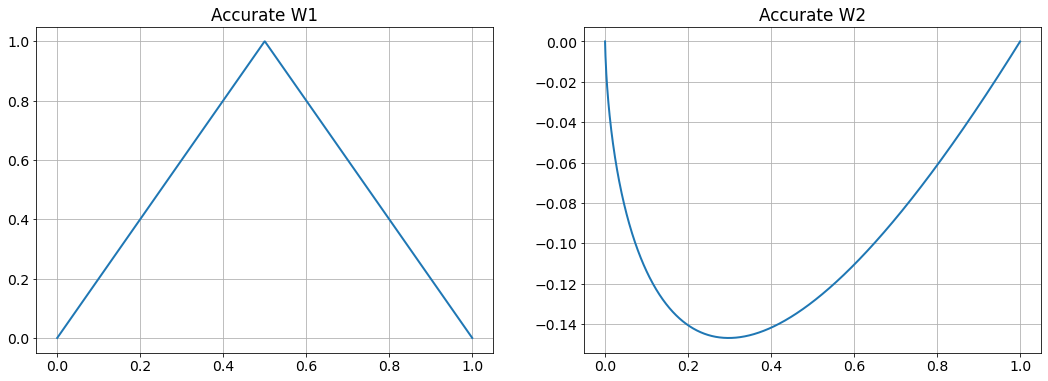

In [15]:
alpha, b, c = 1,2,3
XkW1 = np.linspace(0,1,1000)
A = FEMd(XkW1, alpha, b, c)
F = FW1(XkW1,alpha,b,c)
UW1 = np.linalg.solve(A,F)

XkW2 = np.linspace(0,1,1000)
A = FEMd(XkW2, alpha, b, c)
F = FW2(XkW2,alpha,b,c)
UW2 = np.linalg.solve(A,F)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(XkW1, UW1)
ax1.set_title("Accurate W1")
ax2.plot(XkW2, UW2)
ax2.set_title("Accurate W2")
plt.show()

In [16]:
def convergence_d(u_exact, alpha, b, c, F_func, M): 
    P = 5
    stepconv = np.zeros(P)
    L2conv = np.zeros(P)
    H1conv = np.zeros(P)
    M = M

    xx = np.linspace(0,1,int(2**(P+2)*M))
    
    for p in range(P):
        x = np.linspace(0,1,M)
        A = FEMd(x, alpha, b, c)
        F = F_func(x,alpha,b,c)
        # Boundary conditions
        A[0,:] = 0;
        A[0,0] = 1
        A[-1,:] = 0
        A[-1,-1] = 1

        F[0] = 0
        F[-1] = 0
        U = np.linalg.solve(A,F)
        U = np.interp(xx,x,U)
        
        EL2 = np.trapz((U-u_exact(xx))**2,xx)
        EH1 = np.sqrt(EL2 + np.trapz(np.gradient(U-u_exact(xx),xx)**2,xx))
        EL2 = np.sqrt(EL2)
        
        stepconv[p] = (x[1]-x[0])
        L2conv[p] = np.abs(EL2)
        H1conv[p] = np.abs(EH1)
        M = 2*M
        
    L2order = np.polyfit(np.log(stepconv),np.log(L2conv),1)[0]
    H1order = np.polyfit(np.log(stepconv),np.log(H1conv),1)[0]
    return stepconv, L2conv, L2order, H1conv, H1order 

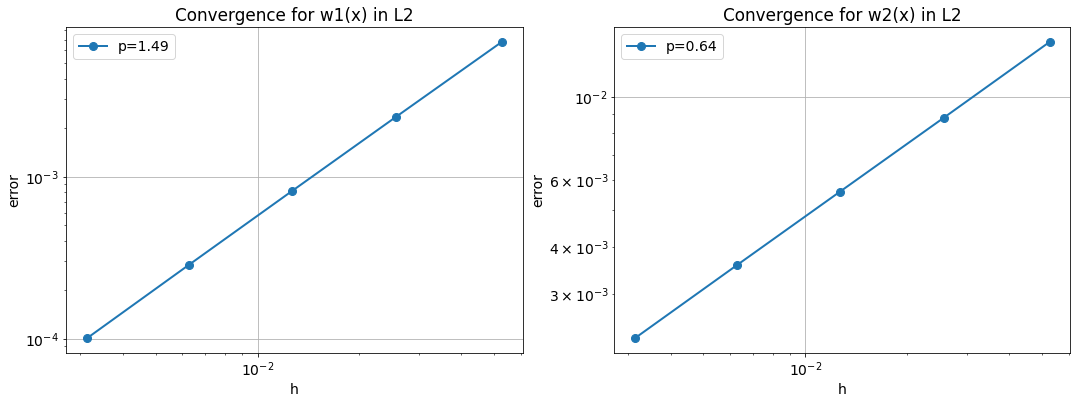

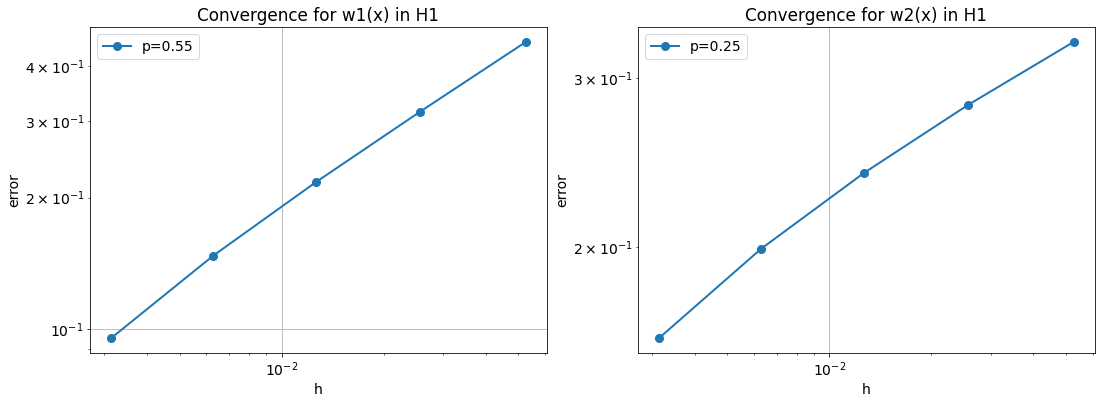

In [17]:
step1, L21, pL21, H11, pH11 = convergence_d(w1, 1,2,3, FW1, 20)
step2, L22, pL22, H12, pH12 = convergence_d(w2, 1,2,3, FW2, 20)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.loglog(step1,L21,'o-', label='p={:.2f}'.format(pL21))
ax1.grid('on')
ax1.set_xlabel('h')
ax1.set_ylabel('error')
ax1.set_title('Convergence for w1(x) in L2')
ax1.legend();

ax2.loglog(step2,L22,'o-', label='p={:.2f}'.format(pL22))
ax2.grid('on')
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title('Convergence for w2(x) in L2')
ax2.legend();
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.loglog(step1,H11,'o-', label='p={:.2f}'.format(pH11))
ax1.grid('on')
ax1.set_xlabel('h')
ax1.set_ylabel('error')
ax1.set_title('Convergence for w1(x) in H1')
ax1.legend();

ax2.loglog(step2,H12,'o-', label='p={:.2f}'.format(pH12))
ax2.grid('on')
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title('Convergence for w2(x) in H1')
ax2.legend();
plt.show()

### e)

In [18]:
def fe(x,alpha,b,c):
    _,_,_=alpha,b,c
    return x**(-1/4)
    #return np.full_like(x,1)

In [19]:
#changing node concentration
node_contracted = lambda x : x**(3/2)
node_root = lambda x : np.sqrt(x)
node_stretched = lambda x : x**(2/3)
sigmoid = lambda x : (1+np.sin(x*np.pi-np.pi/2))/2

In [20]:
alpha,b,c = 1,100,3000
Xk_accurate = np.linspace(0,1,1000)
A,F = FEM(Xk_accurate, alpha, b, c, fe)
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
U_accurate = np.linalg.solve(A,F)

nodefnc = sigmoid

A,F = FEM(nodefnc(Xk_accurate), alpha, b, c, fe)
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
U_accurate_uneven = np.linalg.solve(A,F)

<ipython-input-18-0922013b13a5>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return x**(-1/4)


<ipython-input-18-0922013b13a5>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return x**(-1/4)


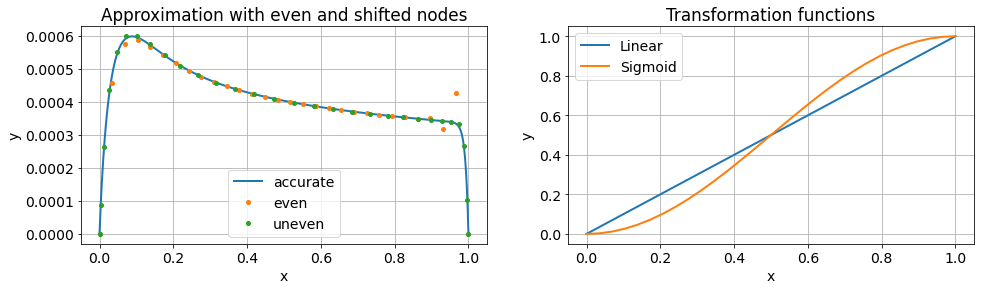

In [21]:
alpha,b,c = 1,100,3000

Xk_even = np.linspace(0,1,30)
A,F = FEM(Xk_even, alpha, b, c, fe)
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
U_even = np.linalg.solve(A,F)


Xk_uneven = nodefnc(Xk_even)
A,F = FEM(Xk_uneven, alpha, b, c, fe)
# Boundary conditions
A[0,:] = 0;
A[0,0] = 1
A[-1,:] = 0
A[-1,-1] = 1

F[0] = 0
F[-1] = 0
U_uneven = np.linalg.solve(A,F)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(Xk_accurate,U_accurate, label='accurate')
ax1.plot(Xk_even, U_even, '.',label='even')
ax1.plot(Xk_uneven, U_uneven, '.', label='uneven')
ax1.set_title("Approximation with even and shifted nodes")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.plot(Xk_even, Xk_even,label='Linear')
ax2.plot(Xk_even, Xk_uneven,label='Sigmoid')
ax2.set_title("Transformation functions")
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.legend()
plt.show()

In [22]:
def convergence_e(u_accurate, alpha, b, c, f, M, nodefnc): 
    P = 5
    stepconv = np.zeros(P)
    L2conv = np.zeros(P)
    H1conv = np.zeros(P)
    N = len(u_accurate)
    M = M
    
    xx = np.linspace(0,1,int(len(u_accurate)*4))
    
    u_accurate = np.interp(xx,np.linspace(0,1,len(u_accurate)),u_accurate)
    
    for p in range(P):
        x = nodefnc(np.linspace(0,1,M))

        A,F = FEM(x, alpha, b, c, f)
        # Boundary conditions
        A[0,:] = 0;
        A[0,0] = 1
        A[-1,:] = 0
        A[-1,-1] = 1

        F[0] = 0
        F[-1] = 0

        U = np.linalg.solve(A,F)
        U = np.interp(xx,x,U)
        
        EL2 = np.trapz((U-u_accurate)**2,xx)
        EH1 = np.sqrt(EL2 + np.trapz(np.gradient(U-u_accurate,xx)**2,xx))
        EL2 = np.sqrt(EL2)
        
        stepconv[p] = (1/M)
        L2conv[p] = np.abs(EL2)
        H1conv[p] = np.abs(EH1)
        M = 2*M
        
    L2order = np.polyfit(np.log(stepconv),np.log(L2conv),1)[0]
    H1order = np.polyfit(np.log(stepconv),np.log(H1conv),1)[0]
    return stepconv, L2conv, L2order, H1conv, H1order 

<ipython-input-18-0922013b13a5>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return x**(-1/4)


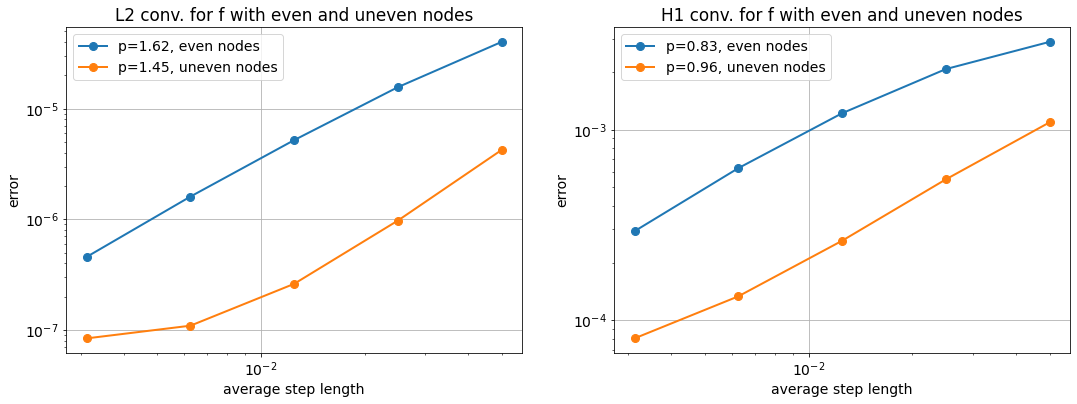

In [23]:
alpha,b,c = 1,100,3000

evenconv, L2even, pL2even, H1even, pH1even = convergence_e(U_accurate, alpha,b,c, fe, 20, lambda x : x)
unevenconv, L2uneven, pL2uneven, H1uneven, pH1uneven = convergence_e(U_accurate, alpha,b,c, fe, 20, nodefnc)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
#fig, ax1 = plt.subplots(figsize=(14,6))
ax1.loglog(evenconv, L2even,'o-', label='p={:.2f}, even nodes'.format(pL2even))
ax1.loglog(unevenconv, L2uneven,'o-', label='p={:.2f}, uneven nodes'.format(pL2uneven))
ax1.grid('on')
ax1.set_xlabel('average step length')
ax1.set_ylabel('error')
ax1.set_title('L2 conv. for f with even and uneven nodes')
ax1.legend();

#fig, ax2 = plt.subplots(figsize=(14,6))
ax2.loglog(evenconv, H1even,'o-', label='p={:.2f}, even nodes'.format(pH1even))
ax2.loglog(unevenconv, H1uneven,'o-', label='p={:.2f}, uneven nodes'.format(pH1uneven))
ax2.grid('on')
ax2.set_xlabel('average step length')
ax2.set_ylabel('error')
ax2.set_title('H1 conv. for f with even and uneven nodes')
ax2.legend();
plt.show()